# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot

# Read CSV file

In [2]:
df = pd.read_csv(r"D:\JP CERTIFICATES\IITK\Course summerterm\customerdataset\customer_shopping_data.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       99457 non-null  int32
 1   quantity                  99457 non-null  int32
 2   price                     99457 non-null  int32
 3   gender_Female             99457 non-null  int32
 4   gender_Male               99457 non-null  int32
 5   category_Books            99457 non-null  int32
 6   category_Clothing         99457 non-null  int32
 7   category_Cosmetics        99457 non-null  int32
 8   category_Food & Beverage  99457 non-null  int32
 9   category_Shoes            99457 non-null  int32
 10  category_Souvenir         99457 non-null  int32
 11  category_Technology       99457 non-null  int32
 12  category_Toys             99457 non-null  int32
dtypes: int32(13)
memory usage: 4.9 MB


In [73]:
df.head()

,age,quantity,price,gender_Female,gender_Male,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
0,28,5,1500,1,0,0,1,0,0,0,0,0,0
1,21,3,1800,0,1,0,0,0,0,1,0,0,0
2,20,1,300,0,1,0,1,0,0,0,0,0,0
3,66,5,3000,1,0,0,0,0,0,1,0,0,0
4,53,4,60,1,0,1,0,0,0,0,0,0,0


# Dropping the columns which doesn't have any correlation with the price prediction

In [4]:
df.drop(columns=['invoice_no', 'customer_id', 'payment_method', 'invoice_date', 'shopping_mall'], inplace=True)

# Converting Character values to binary numbers suing getdummies

In [5]:
# Convert categorical column to binary using get_dummies
df = pd.get_dummies(df, columns=['gender', 'category'])

# Convert True/False to 1/0
df = df.astype(int)

In [6]:
df.head()

,age,quantity,price,gender_Female,gender_Male,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
0,28,5,1500,1,0,0,1,0,0,0,0,0,0
1,21,3,1800,0,1,0,0,0,0,1,0,0,0
2,20,1,300,0,1,0,1,0,0,0,0,0,0
3,66,5,3000,1,0,0,0,0,0,1,0,0,0
4,53,4,60,1,0,1,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       99457 non-null  int32
 1   quantity                  99457 non-null  int32
 2   price                     99457 non-null  int32
 3   gender_Female             99457 non-null  int32
 4   gender_Male               99457 non-null  int32
 5   category_Books            99457 non-null  int32
 6   category_Clothing         99457 non-null  int32
 7   category_Cosmetics        99457 non-null  int32
 8   category_Food & Beverage  99457 non-null  int32
 9   category_Shoes            99457 non-null  int32
 10  category_Souvenir         99457 non-null  int32
 11  category_Technology       99457 non-null  int32
 12  category_Toys             99457 non-null  int32
dtypes: int32(13)
memory usage: 4.9 MB


# Correlation Matrix for the dataset

Text(0.5, 1.0, 'Correlation matrix of Customer shopping')

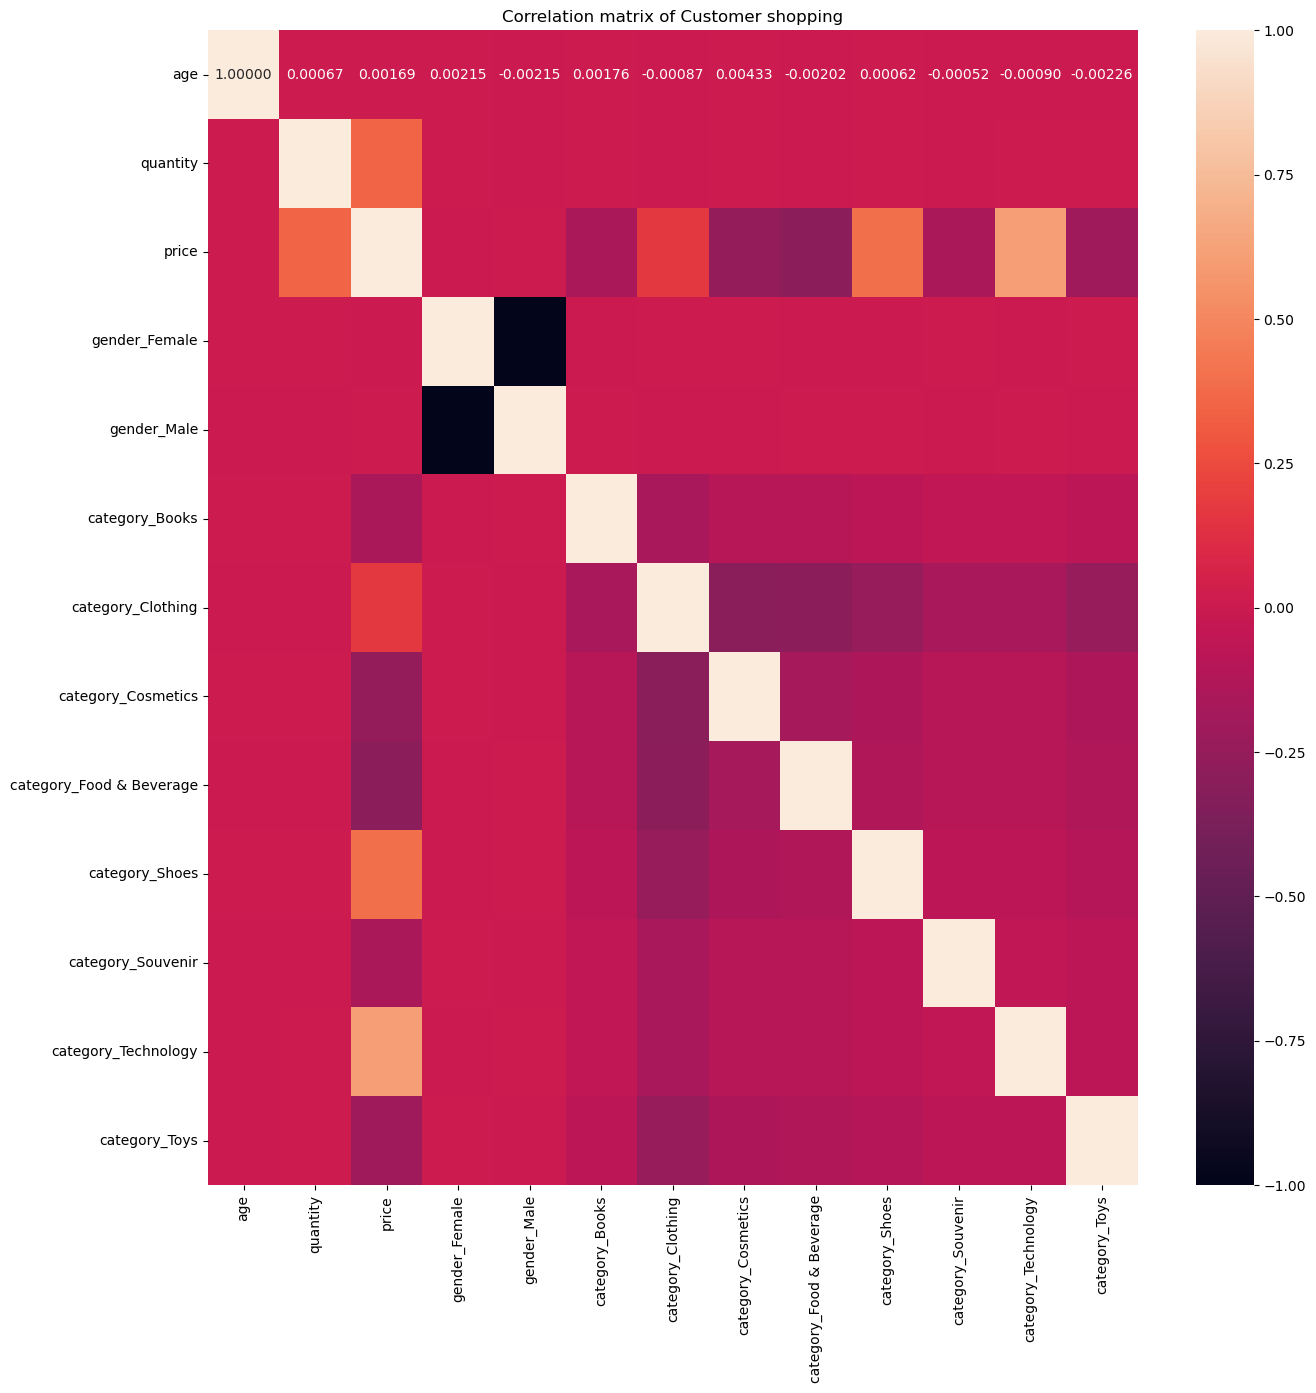

In [8]:
corr_matrix = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot= True, fmt = '0.5f')
plt.title('Correlation matrix of Customer shopping')

In [9]:
df.columns

Index(['age', 'quantity', 'price', 'gender_Female', 'gender_Male',
       'category_Books', 'category_Clothing', 'category_Cosmetics',
       'category_Food & Beverage', 'category_Shoes', 'category_Souvenir',
       'category_Technology', 'category_Toys'],
      dtype='object')

# Bifurcating the dataset into dependent and independent features

In [11]:
X = df.drop('price', axis = 'columns')
y = df['price']

In [12]:
X

,age,quantity,gender_Female,gender_Male,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
0,28,5,1,0,0,1,0,0,0,0,0,0
1,21,3,0,1,0,0,0,0,1,0,0,0
2,20,1,0,1,0,1,0,0,0,0,0,0
3,66,5,1,0,0,0,0,0,1,0,0,0
4,53,4,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,45,5,1,0,0,0,0,0,0,1,0,0
99453,27,2,0,1,0,0,0,1,0,0,0,0
99454,63,2,0,1,0,0,0,1,0,0,0,0
99455,56,4,0,1,0,0,0,0,0,0,1,0


In [13]:
y

0        1500
1        1800
2         300
3        3000
4          60
         ... 
99452      58
99453      10
99454      10
99455    4200
99456      35
Name: price, Length: 99457, dtype: int32

## Training and testing dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 34) 

In [16]:
y_train

49459      71
97744     179
86373     143
2738       40
1804      300
         ... 
68693    1500
93942    1200
22377     143
43498    1200
77217    1500
Name: price, Length: 79565, dtype: int32

## feature scaling the trained dataset

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

## Fit and transform using standardization around mean.

In [19]:
# Scaled data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Initializing Linear Regression

In [20]:
from sklearn.linear_model import  LinearRegression

In [21]:
linearreg_model = LinearRegression()
linearreg_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_train_pred = linearreg_model.predict(X_train)
y_train_pred

array([-124.67852695,  565.68571796,  339.41317106, ...,  337.47276706,
       1127.44081229, 1357.24315253])

In [23]:
y_test_pred = linearreg_model.predict(X_test)
y_test_pred

array([1804.16754574,  676.48767399, 1126.80334699, ...,  126.72691143,
        903.454412  ,  901.91263868])

+ calculating metrics

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

139585.33573980373
0.8412206837201464


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

147194.99671719118
0.838805372410528


## Initiating Lasso and Ridge regressions

In [26]:
from sklearn.linear_model import Lasso, Ridge

In [27]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [28]:
y_train_pred = lasso_reg.predict(X_train)
y_train_pred

array([-119.26412409,  566.52462956,  339.74691359, ...,  339.08159581,
       1126.14966646, 1354.98986752])

In [29]:
y_test_pred = lasso_reg.predict(X_test)
y_test_pred

array([1803.32097094,  677.64841813, 1127.7859004 , ...,  118.99172241,
        903.31659444,  902.85036708])

+ Calculating metrics

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

139593.5939405682
0.8412112899577993


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

147439.61725484006
0.8385374861552444


## Ridge regression

In [32]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [33]:
y_train_pred = ridge_reg.predict(X_train)
y_train_pred

array([-124.66917081,  565.68647028,  339.41673866, ...,  337.47633687,
       1127.4362222 , 1357.23566066])

In [34]:
y_test_pred = ridge_reg.predict(X_test)
y_test_pred

array([1804.15493499,  676.48867816, 1126.79873945, ...,  126.73285668,
        903.45261027,  901.91083266])

+ Calculating metrics

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

139585.33583956485
0.8412206836066674


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

147195.34436896385
0.8388049916937966


## SVM algorithm

In [37]:
from sklearn.svm import SVC

In [38]:
svm = SVC(max_iter = 1000)
svm.fit(X_train, y_train)

SVC(max_iter=1000)

In [39]:
y_train_pred = svm.predict(X_train)
y_train_pred

array([  71,  179,  143, ...,  143, 1200, 1500])

In [40]:
y_test_pred = ridge_reg.predict(X_test)
y_test_pred

array([1804.15493499,  676.48867816, 1126.79873945, ...,  126.73285668,
        903.45261027,  901.91083266])

+ calculating metrics

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.0
1.0


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

147195.34436896385
0.8388049916937966


## Decision Tree Regressor algorithm

In [43]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [44]:
# Initialize and train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_train_pred = dt_regressor.predict(X_train)
y_train_pred

array([  71.,  179.,  143., ...,  143., 1200., 1500.])

In [46]:
y_test_pred = dt_regressor.predict(X_test)
y_test_pred

array([1800.,  600., 1200., ...,  121.,  900.,  900.])

+ calculating metrics

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.0
1.0


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.0
1.0


## Random Forest algorithm

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_train_pred = rf_classifier.predict(X_train)
y_train_pred

array([  71,  179,  143, ...,  143, 1200, 1500])

In [52]:
y_test_pred = dt_regressor.predict(X_test)
y_test_pred

array([1800.,  600., 1200., ...,  121.,  900.,  900.])

+ calculating metrics

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.0
1.0


In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.0
1.0


## KNN algorithm

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [56]:
y_train_pred = knn.predict(X_train)
y_train_pred

array([  71.,  179.,  143., ...,  143., 1200., 1500.])

In [57]:
y_test_pred = knn.predict(X_test)
y_test_pred

array([1800.,  600., 1200., ...,  121.,  900.,  900.])

+ calculating metrics

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_train, y_train_pred)
print(mean)
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.0
1.0


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
mean = mean_squared_error(y_test, y_test_pred)
print(mean)
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.0
1.0


+ The RMSE and r2 for DecisionTree, RandomForest and KNN are unreal and underfitting. Hence I am not considering these algorithms.
+ Since linear regression algorithm is giving less RMSE comparing to other algorithms, it is best for price prediction.

# Model Performance Metrics

In this notebook, we document the performance metrics for different algorithms using RMSE (Root Mean Squared Error) and R² (Coefficient of Determination).

| Algorithm           | RMSE              | R²                 |
|---------------------|--------------------|---------------------|
| **Linear Regression** | 147194.997        | 0.8388              |
| **Lasso**             | 147439.617        | 0.8385              |
| **Ridge**             | 147195.344        | 0.8388              |
| **SVM**               | 147195.344        | 0.8388                 |

**Notes:**
- **RMSE** is the square root of the mean of the squared errors. It measures the average magnitude of the errors in predictions.
- **R²** is the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates the 

## Visualization for Linear Regression

+ Scatter Plot (Pairplot)

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is 

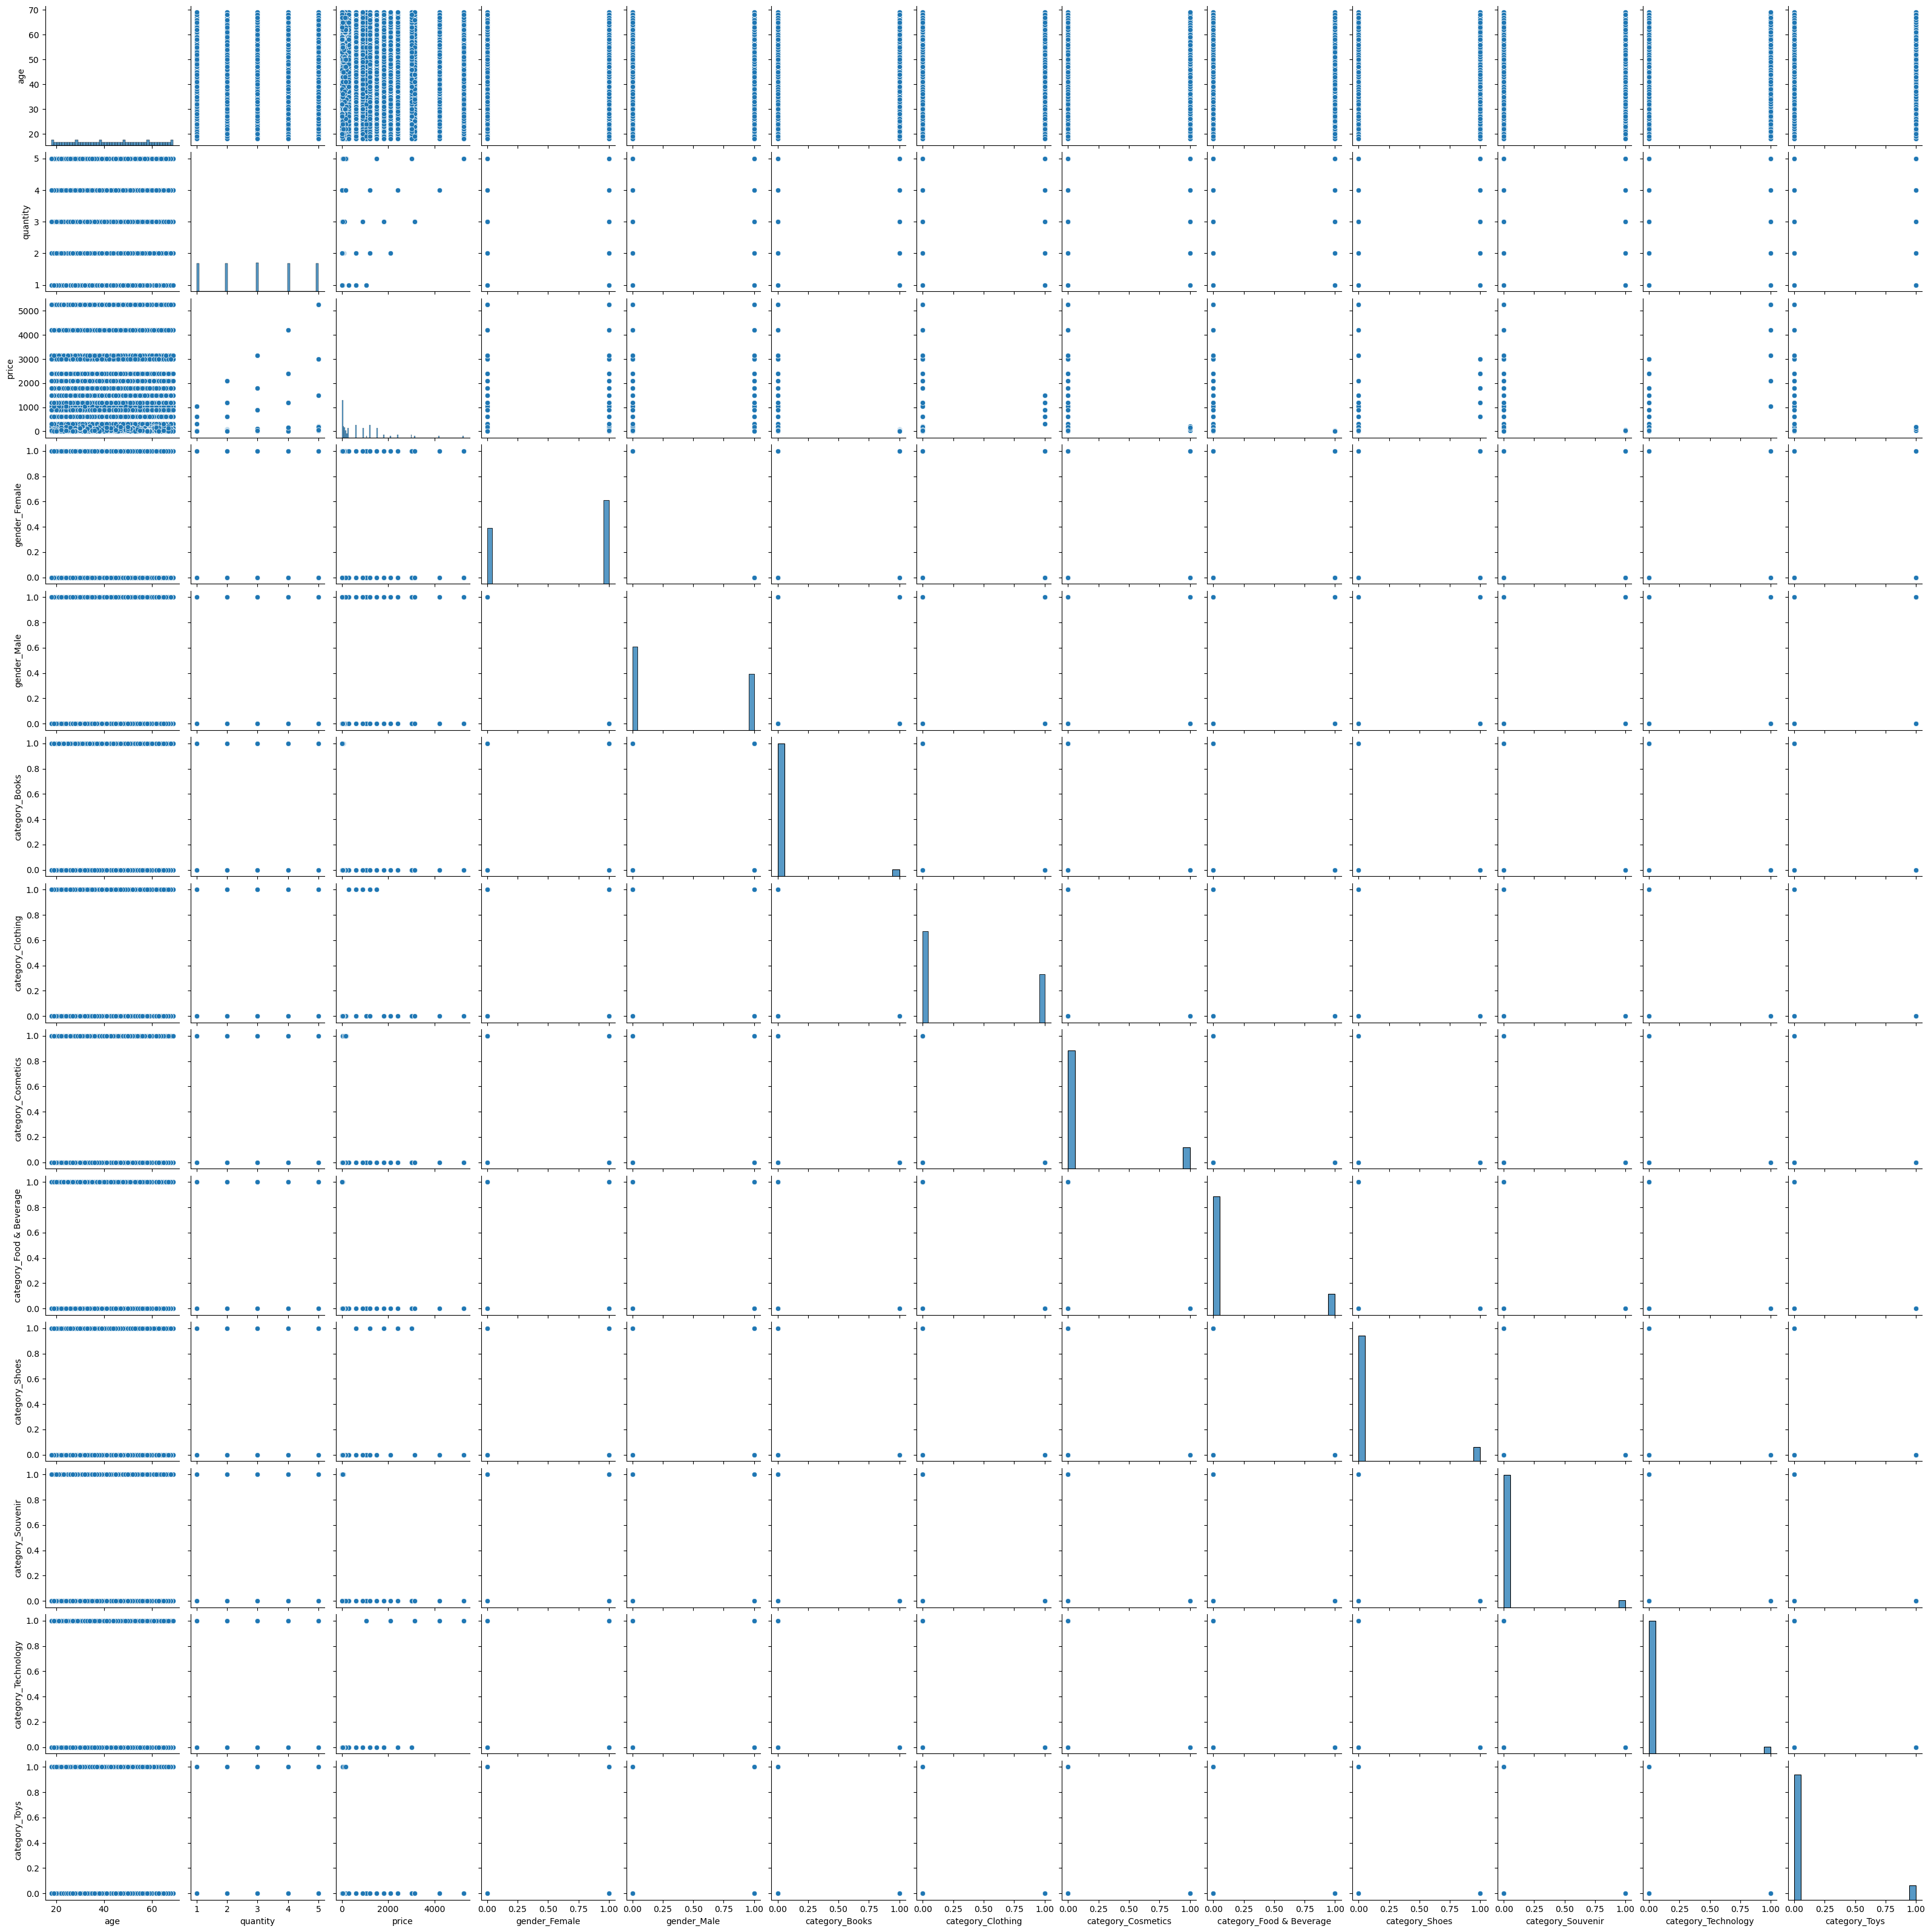

In [65]:
import seaborn as sns

# Assuming `df` is your DataFrame containing independent and dependent variables
sns.pairplot(df)
plt.show()


+ Correlation Heatmap

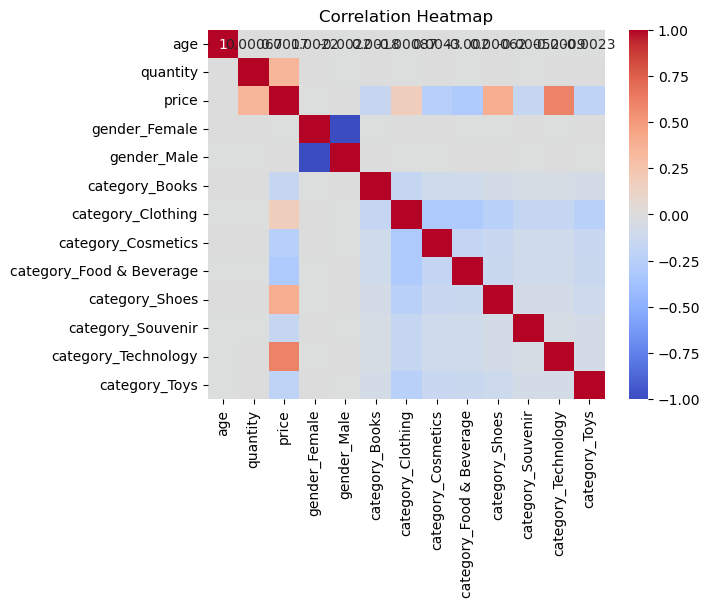

In [66]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


+ Residuals Plot for Each Predictor

C:\Users\JAYA PRAKASH\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



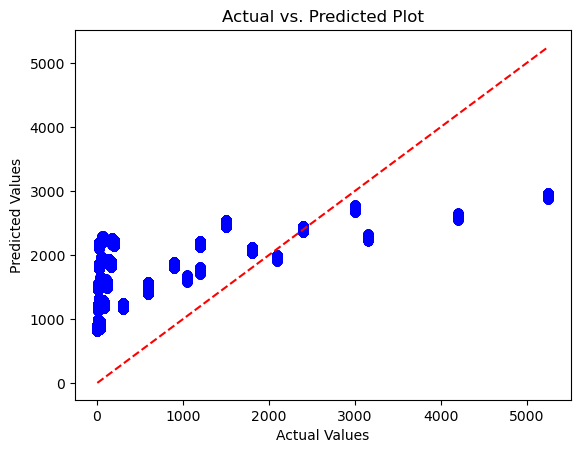

In [69]:
plt.scatter(y, linearreg_model.predict(X), color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()